In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
import geopandas

In [95]:
import sys
sys.path.append('/Fiuba-Big-Data-Analytics-TPs/Tp1/')

from BySanti import filter

In [96]:
url = 'https://raw.githubusercontent.com/Fiuba-Big-Data-Analytics/Fiuba-Big-Data-Analytics-TPs/main/Tp1/Datos/Entrenamieto_ECI_2020.csv'
entrenamiento = pd.read_csv(url)
filter.full_correction(entrenamiento)

In [97]:
entrenamiento.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,Total_Power,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,NaN,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,NaN,None,NaT,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,"(5, 2016)",Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39.0,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,NaN,None,NaT,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,"(1, 2016)",Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760.0,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,NaN,None,NaT,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,"(1, 2016)",Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,"(2, 2018)",Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,"(2, 2018)",Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,"(2, 2018)",Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2015-12

In [98]:
entrenamiento.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [99]:
RegionCountStage = entrenamiento[['ID','Region', 'Stage']].groupby(['Region', 'Stage']).count().unstack()
RegionCountStage.columns = ['Closed_Lost_Count',	'Closed_Won_Count'	,'Negotiation_Count'	,'Proposal_Count'	,'Qualification_Count' ]
RegionCountStage = RegionCountStage.fillna(0)

In [100]:
RegionCountStage

,Closed_Lost_Count,Closed_Won_Count,Negotiation_Count,Proposal_Count,Qualification_Count
Region,,,,,
APAC,1355.0,1896.0,0.0,8.0,3.0
Americas,2140.0,1793.0,8.0,4.0,0.0
EMEA,2189.0,2471.0,1.0,3.0,0.0
Japan,1546.0,3323.0,1.0,14.0,8.0
Middle East,120.0,50.0,8.0,6.0,0.0


In [101]:
RegionCountStage.index

Index(['APAC', 'Americas', 'EMEA', 'Japan', 'Middle East'], dtype='object', name='Region')

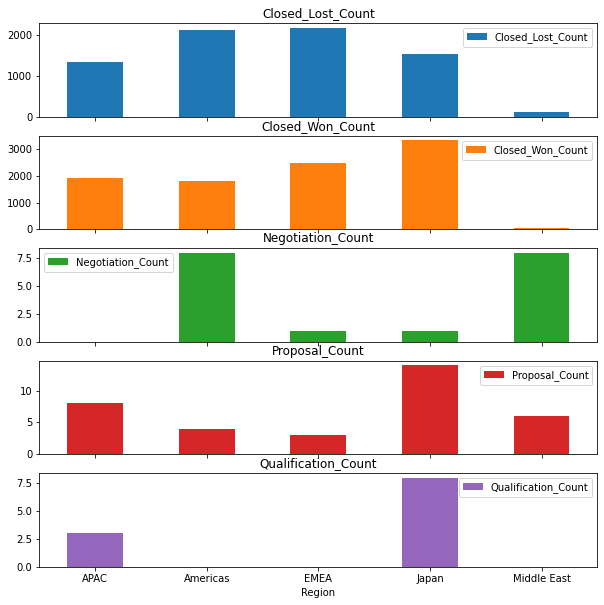

In [102]:
axes = RegionCountStage.plot.bar(rot=0, subplots=True, figsize=(10,10))


In [103]:
TerritoryCount = entrenamiento[['ID','Territory', 'Stage']].groupby(['Territory', 'Stage']).count().unstack()
TerritoryCount.columns = ['Closed_Lost_Count',	'Closed_Won_Count'	,'Negotiation_Count'	,'Proposal_Count'	,'Qualification_Count' ]
TerritoryCount = TerritoryCount.fillna(0)
TerritoryCount["Total"] = TerritoryCount.sum(axis=1)
TerritoryCount = TerritoryCount.reset_index().sort_values(by=['Total'],ascending=False)
TerritoryCount

,Territory,Closed_Lost_Count,Closed_Won_Count,Negotiation_Count,Proposal_Count,Qualification_Count,Total
47,None,1947.0,3034.0,1.0,10.0,7.0,4999.0
23,Germany,659.0,1023.0,0.0,0.0,0.0,1682.0
44,NW America,587.0,973.0,8.0,0.0,0.0,1568.0
2,Australia,506.0,696.0,0.0,4.0,2.0,1208.0
26,India,433.0,374.0,0.0,1.0,1.0,809.0
...,...,...,...,...,...,...,...
8,Burma,1.0,0.0,0.0,0.0,0.0,1.0
60,Solomon Islands,1.0,0.0,0.0,0.0,0.0,1.0
59,Slovenia,0.0,1.0,0.0,0.0,0.0,1.0
41,Monaco,1.0,0.0,0.0,0.0,0.0,1.0


In [104]:
#Quito los None
TerritoryCount = TerritoryCount.mask(TerritoryCount.eq('None')).dropna()
TerritoryCount

,Territory,Closed_Lost_Count,Closed_Won_Count,Negotiation_Count,Proposal_Count,Qualification_Count,Total
23,Germany,659.0,1023.0,0.0,0.0,0.0,1682.0
44,NW America,587.0,973.0,8.0,0.0,0.0,1568.0
2,Australia,506.0,696.0,0.0,4.0,2.0,1208.0
26,India,433.0,374.0,0.0,1.0,1.0,809.0
43,NE America,501.0,259.0,0.0,0.0,0.0,760.0
...,...,...,...,...,...,...,...
8,Burma,1.0,0.0,0.0,0.0,0.0,1.0
60,Solomon Islands,1.0,0.0,0.0,0.0,0.0,1.0
59,Slovenia,0.0,1.0,0.0,0.0,0.0,1.0
41,Monaco,1.0,0.0,0.0,0.0,0.0,1.0


In [109]:
TerritoryCount.Territory.apply(str)

23            Germany
44         NW America
2           Australia
26              India
43         NE America
           ...       
8               Burma
60    Solomon Islands
59           Slovenia
41             Monaco
22            Georgia
Name: Territory, Length: 75, dtype: object

In [110]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

# declare an empty list to store 
# latitude and longitude of values 
# of city column 
longitude = [] 
latitude = [] 

# function to find the coordinate 
# of a given city 
def findGeocode(city): 
	
	# try and catch is used to overcome 
	# the exception thrown by geolocator 
	# using geocodertimedout 
	try: 
		
		# Specify the user_agent as your 
		# app name it should not be none 
		geolocator = Nominatim(user_agent="your_app_name") 
		
		return geolocator.geocode(city) 
	
	except GeocoderTimedOut: 
		
		return findGeocode(city)	 

# each value from city column 
# will be fetched and sent to 
# function find_geocode 
for i in (TerritoryCount['Territory']): 
	
	if findGeocode(i) != None: 
		
		loc = findGeocode(i) 
		
		# coordinates returned from 
		# function is stored into 
		# two separate list 
		latitude.append(loc.latitude) 
		longitude.append(loc.longitude) 
	
	# if coordinate for a city not 
	# found, insert "NaN" indicating 
	# missing value 
	else: 
		latitude.append(np.nan) 
		longitude.append(np.nan) 


In [111]:

TerritoryCount["Longitude"] = longitude 
TerritoryCount["Latitude"] = latitude 
TerritoryCountTotal = TerritoryCount[['Territory', 'Total', 'Longitude', 'Latitude' ]]
TerritoryCountTotal

,Territory,Total,Longitude,Latitude
23,Germany,1682.0,10.423447,51.083420
44,NW America,1568.0,-109.000000,51.000000
2,Australia,1208.0,134.755000,-24.776109
26,India,809.0,78.667743,22.351115
43,NE America,760.0,13.425079,13.777726
...,...,...,...,...
8,Burma,1.0,95.999965,17.175050
60,Solomon Islands,1.0,159.107110,-8.705394
59,Slovenia,1.0,14.480837,45.813311
41,Monaco,1.0,7.427683,43.732349


In [147]:
gdf = geopandas.GeoDataFrame( TerritoryCountTotal, geometry=geopandas.points_from_xy(TerritoryCountTotal.Longitude, TerritoryCountTotal.Latitude))
gdf

,Territory,Total,Longitude,Latitude,geometry
23,Germany,1682.0,10.423447,51.083420,POINT (10.42345 51.08342)
44,NW America,1568.0,-109.000000,51.000000,POINT (-109.00000 51.00000)
2,Australia,1208.0,134.755000,-24.776109,POINT (134.75500 -24.77611)
26,India,809.0,78.667743,22.351115,POINT (78.66774 22.35111)
43,NE America,760.0,13.425079,13.777726,POINT (13.42508 13.77773)
...,...,...,...,...,...
8,Burma,1.0,95.999965,17.175050,POINT (95.99997 17.17505)
60,Solomon Islands,1.0,159.107110,-8.705394,POINT (159.10711 -8.70539)
59,Slovenia,1.0,14.480837,45.813311,POINT (14.48084 45.81331)
41,Monaco,1.0,7.427683,43.732349,POINT (7.42768 43.73235)


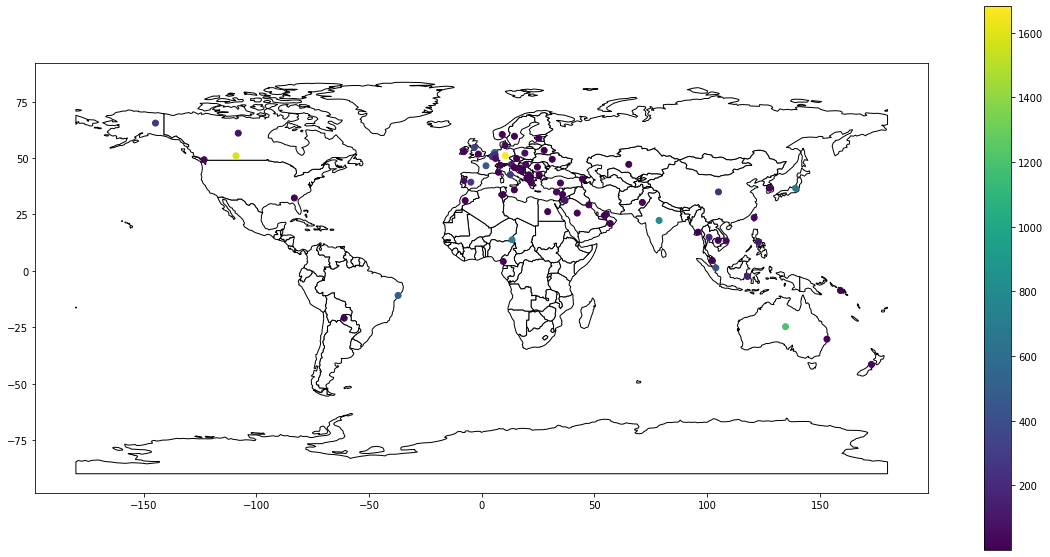

In [169]:
base = world.plot(color='white', edgecolor='black',figsize= (20, 10))
gdf.plot(column  = 'Total',ax = base, legend = True, figsize= (20,10))